<a href="https://colab.research.google.com/github/Pterjudin/My-Deep-Learning-Lab/blob/main/Binary_Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i -  3, '?') for i in train_data[0]]
)

1654784/1641221 [==============================] - 0s 0us/step


In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:] 


history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 15s 55ms/step - loss: 0.5952 - accuracy: 0.6935 - val_loss: 0.3923 - val_accuracy: 0.8665
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3319 - accuracy: 0.9003 - val_loss: 0.3302 - val_accuracy: 0.8686
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2286 - accuracy: 0.9303 - val_loss: 0.3144 - val_accuracy: 0.8737
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1766 - accuracy: 0.9467 - val_loss: 0.3004 - val_accuracy: 0.8788
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1421 - accuracy: 0.9562 - val_loss: 0.3046 - val_accuracy: 0.8836
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1155 - accuracy: 0.9666 - val_loss: 0.2941 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0927 - accuracy: 0.9746 - val_loss: 0.3188 - val_accuracy: 0.8797
Epoch 8/20
3

In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

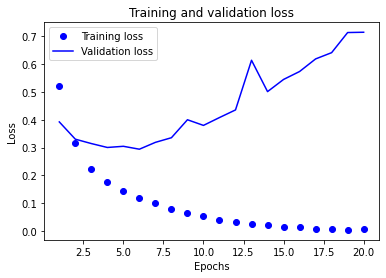

In [9]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

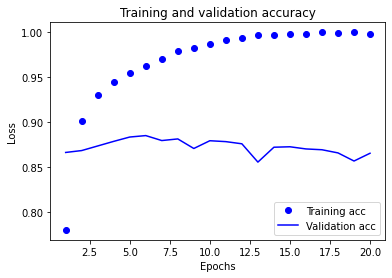

In [10]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.5259 - accuracy: 0.7438
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2586 - accuracy: 0.9156
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.1910 - accuracy: 0.9338
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2971 - accuracy: 0.8834


[0.2971420884132385, 0.8833600282669067]